In [15]:
import tensorflow as tf
import cv2
import pandas as pd
import os
import numpy as np

In [16]:
js = "/home/bnrc2/mu/deepcut-pose/python/ly.csv"

In [17]:
img_path="/home/bnrc2/mu/deepcut-pose/python/ly_resize"

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

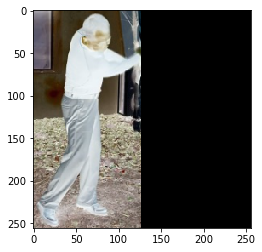

In [19]:
json = pd.read_csv(js)
for index, row in json.iterrows():
    name = os.path.splitext(row['name'])[0]

    img_dir = os.path.join(img_path,name+".jpg" )
    if not os.path.exists(img_dir):
        continue
    #print(img_dir)
    x1, y1, x2, y2 = int(row['x1']), int(row['y1']), int(row['x2']), int(row['y2'])
    img = cv2.imread(img_dir)
    human = img[y1:y2, x1:x2]
    img_padd = np.zeros([256,256,3])
    board_w = x2 - x1
    board_h = y2 - y1
    resize = 256

    if board_h < board_w:
        newsize = (resize, board_h * resize // board_w)
    else:
        newsize = (board_w * resize // board_h, resize)
    img_reshape = cv2.resize(human, newsize)
    if (img_reshape.shape[0] < resize):  # 高度不够，需要补0。则要对item[6:]中的第二个值进行修改
        up = 0
        down = img_reshape.shape[0]
        img_padd[up:down, :, :] = img_reshape
    elif (img_reshape.shape[1] < resize):
        left = 0
        right = img_reshape.shape[1]
        img_padd[:, left:right, :] = img_reshape
    plt.imshow(img_padd)
    break

In [24]:
%cd ./tf-posegan/
from predict_class import test_class
from hg_models.hg import hgmodel

/home/bnrc2/mu/tf-posegan


In [28]:
model = hgmodel()
test = test_class(model=model, nstack=4,
                         test_json="/home/bnrc2/mu/deepcut-pose/python/ly.csv",
                              resume="/media/bnrc2/_backup/models/gan/hourglass_8_2_3999_0.334333",#/media/bnrc2/_backup/golf/model/tiny_hourglass_21,
                            gpu=[0],partnum=14,
                             )

test.generateModel()

  [TL] InputLayer  input: (?, 256, 256, 3)
  [TL] Conv2dLayer hg_model/conv1: shape:[7, 7, 3, 64] strides:[1, 2, 2, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_model/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] BatchNormLayer hg_model/Residual1/Residual1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_model/Residual1/Residual1_convBlock/conv1: shape:[1, 1, 64, 64.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_model/Residual1/Residual1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_model/Residual1/Residual1_convBlock/conv2: shape:[3, 3, 64, 64.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_model/Residual1/Residual1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_model/Residual1/Residual1_convBlock/conv3: shape:[1, 1, 64, 128] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] Co

  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmplow_0/stage_0_hg_low2_3_tmplow_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmplow_0/stage_0_hg_low2_3_tmplow_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmplow_0/stage_0_hg_low2_3_tmplow_0_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmplow_0/stage_0_hg_low2_3_tmplow_0_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_tmplow_0/stage_0_hg_low2_3_tmplow_0_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_0_hg/

  [TL] PoolLayer   hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/pool1: ksize:[1, 2, 2, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmpup_0/stage_0_hg_low2_3_low2_2_low2_1_tmpup_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmpup_0/stage_0_hg_low2_3_low2_2_low2_1_tmpup_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmpup_0/stage_0_hg_low2_3_low2_2_low2_1_tmpup_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:Fal

  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_0/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_0_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_0/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_0_add_layer: size:(?, 4, 4, 256) fn:add
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_low2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_1/stage_0_hg_low2_3_low2_2_low2_1_tmplow2_1_convBloc

  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow3_1/stage_0_hg_low2_3_low2_2_tmplow3_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow3_1/stage_0_hg_low2_3_low2_2_tmplow3_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow3_1/stage_0_hg_low2_3_low2_2_tmplow3_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3_low2_2/stage_0_hg_low2_3_low2_2_tmplow3_1/stage_0_hg_low2_3_low2_2_tmplow3_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_0_hg/stage_0_hg_low2_3/stage_0_hg_low2_3

  [TL] Conv2dLayer hg_stack/stage_0_out: shape:[1, 1, 256, 14] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] Conv2dLayer hg_stack/stage_0_conv1: shape:[1, 1, 256, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] Conv2dLayer hg_stack/stage_0_conv2: shape:[1, 1, 256, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] ElementwiseLayer hg_stack/stage_0_add_n: size:(?, 64, 64, 256) fn:add
  [TL] PoolLayer   hg_stack/stage_1/stage_1_hg/pool1: ksize:[1, 2, 2, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_tmpup_0/stage_1_hg_tmpup_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_tmpup_0/stage_1_hg_tmpup_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_tmpup_0/stage_1_hg_tmpup_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_tr

  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow_1/stage_1_hg_low2_3_tmplow_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow_1/stage_1_hg_low2_3_tmplow_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow_1/stage_1_hg_low2_3_tmplow_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow_1/stage_1_hg_low2_3_tmplow_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow_1/stage_1_hg_low2_3_tmplow_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2d

  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_t

  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow3_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow3_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow3_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow3_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_low2_1_tmplow3_0/stage_1_hg_low2_3_low2_2_low2_1_tmplow3_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_low2_2/stage_1_hg_low2_3_low2_2_low2_1/stage_1_hg_low2_3_low2_2_lo

  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow3_1/stage_1_hg_low2_3_tmplow3_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow3_1/stage_1_hg_low2_3_tmplow3_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow3_1/stage_1_hg_low2_3_tmplow3_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow3_1/stage_1_hg_low2_3_tmplow3_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_1/stage_1_hg/stage_1_hg_low2_3/stage_1_hg_low2_3_tmplow3_1/stage_1_hg_low2_3_tmplow3_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [

  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmpup_1/stage_2_hg_tmpup_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmpup_1/stage_2_hg_tmpup_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmpup_1/stage_2_hg_tmpup_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmpup_1/stage_2_hg_tmpup_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmpup_1/stage_2_hg_tmpup_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmpup_1/stage_2_hg_tmpup_1_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] Elementw

  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_tmplow_0/stage_2_hg_low2_3_low2_2_tmplow_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_tmplow_0/stage_2_hg_low2_3_low2_2_tmplow_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_tmplow_0/stage_2_hg_low2_3_low2_2_tmplow_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_tmplow_0/stage_2_hg_low2_3_low2_2_tmplow_0_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/

  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_low2_1/stage_2_hg_low2_3_low2_2_low2_1_tmpup_1/stage_2_hg_low2_3_low2_2_low2_1_tmpup_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_low2_1/stage_2_hg_low2_3_low2_2_low2_1_tmpup_1/stage_2_hg_low2_3_low2_2_low2_1_tmpup_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_low2_1/stage_2_hg_low2_3_low2_2_low2_1_tmpup_1/stage_2_hg_low2_3_low2_2_low2_1_tmpup_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_low2_1/stage_2_hg_low2_3_low2_2_low2_1_tmpup_1

  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_low2_1/stage_2_hg_low2_3_low2_2_low2_1_tmplow3_1/stage_2_hg_low2_3_low2_2_low2_1_tmplow3_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_low2_1/stage_2_hg_low2_3_low2_2_low2_1_tmplow3_1/stage_2_hg_low2_3_low2_2_low2_1_tmplow3_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_low2_1/stage_2_hg_low2_3_low2_2_low2_1_tmplow3_1/stage_2_hg_low2_3_low2_2_low2_1_tmplow3_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_low2_2/stage_2_hg_low2_3_low2_2_low2_1/stage_2_hg_low2_3_low2_2_lo

  [TL] UpSampling2dLayer stage_2_hg_low2_3_Upsample: is_scale:True size:[32, 32] method:1 align_corners:False
  [TL] ElementwiseLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_low2_3/stage_2_hg_low2_3_add_layer: size:(?, 32, 32, 256) fn:add
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmplow3_0/stage_2_hg_tmplow3_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmplow3_0/stage_2_hg_tmplow3_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmplow3_0/stage_2_hg_tmplow3_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmplow3_0/stage_2_hg_tmplow3_0_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_2/stage_2_hg/stage_2_hg_tmplow3_0/stage_2_hg_tmplow

  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow_1/stage_3_hg_tmplow_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow_1/stage_3_hg_tmplow_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow_1/stage_3_hg_tmplow_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow_1/stage_3_hg_tmplow_1_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow_1/stage_3_hg_tmplow_1_convBlock/bn3: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow_1/stage_3_hg_tmplow_1_convBlock/conv3: shape:[1, 1, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:identity
  [

  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_tmplow_0/stage_3_hg_low2_3_low2_2_tmplow_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_tmplow_0/stage_3_hg_low2_3_low2_2_tmplow_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_tmplow_0/stage_3_hg_low2_3_low2_2_tmplow_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_tmplow_0/stage_3_hg_low2_3_low2_2_tmplow_0_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/

  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_low2_1/stage_3_hg_low2_3_low2_2_low2_1_tmpup_1/stage_3_hg_low2_3_low2_2_low2_1_tmpup_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_low2_1/stage_3_hg_low2_3_low2_2_low2_1_tmpup_1/stage_3_hg_low2_3_low2_2_low2_1_tmpup_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_low2_1/stage_3_hg_low2_3_low2_2_low2_1_tmpup_1/stage_3_hg_low2_3_low2_2_low2_1_tmpup_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_low2_1/stage_3_hg_low2_3_low2_2_low2_1_tmpup_1

  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_low2_1/stage_3_hg_low2_3_low2_2_low2_1_tmplow3_1/stage_3_hg_low2_3_low2_2_low2_1_tmplow3_1_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_low2_1/stage_3_hg_low2_3_low2_2_low2_1_tmplow3_1/stage_3_hg_low2_3_low2_2_low2_1_tmplow3_1_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_low2_1/stage_3_hg_low2_3_low2_2_low2_1_tmplow3_1/stage_3_hg_low2_3_low2_2_low2_1_tmplow3_1_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_low2_2/stage_3_hg_low2_3_low2_2_low2_1/stage_3_hg_low2_3_low2_2_lo

  [TL] UpSampling2dLayer stage_3_hg_low2_3_Upsample: is_scale:True size:[32, 32] method:1 align_corners:False
  [TL] ElementwiseLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_low2_3/stage_3_hg_low2_3_add_layer: size:(?, 32, 32, 256) fn:add
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow3_0/stage_3_hg_tmplow3_0_convBlock/bn1: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow3_0/stage_3_hg_tmplow3_0_convBlock/conv1: shape:[1, 1, 256, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow3_0/stage_3_hg_tmplow3_0_convBlock/bn2: decay:0.900000 epsilon:0.000010 act:relu is_train:False
  [TL] Conv2dLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow3_0/stage_3_hg_tmplow3_0_convBlock/conv2: shape:[3, 3, 128, 128.0] strides:[1, 1, 1, 1] pad:SAME act:identity
  [TL] BatchNormLayer hg_stack/stage_3/stage_3_hg/stage_3_hg_tmplow3_0/stage_3_hg_tmplow

In [29]:
test.test_init(img_path="/home/bnrc2/mu/deepcut-pose/python/ly_resize",
                   save_dir="/home/bnrc2/mu/deepcut-pose/python/lygan")

AttributeError: 'test_class' object has no attribute 'Session'